In [1]:
# importing the requried libraries
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# reading the image from the directory
img = cv2.imread('Sachin.jpg')

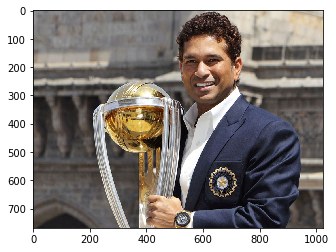

In [3]:
# converting the image into standard RGB format. openCV's default is BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
print(img.shape)

(768, 1024, 3)


In [30]:
c_img = img.copy()
# Resizing the image into a single array of pixels
c_img = np.reshape(c_img,(-1,3))
print(c_img.shape)

(786432, 3)


In [7]:
# Defining the KMeans model with 7 clusters
kmeans = KMeans(n_clusters=7,random_state=2)

In [8]:
# Training the model
kmeans.fit_predict(c_img)

array([4, 4, 4, ..., 0, 0, 0])

In [9]:
# getting the 7 cluster centers
centers = kmeans.cluster_centers_.astype(int)

In [10]:
print(centers)

[[ 96  88  87]
 [242 242 239]
 [ 29  26  30]
 [181 163 139]
 [132 124 118]
 [208 199 184]
 [ 68  61  63]]


In [11]:
# per[i] will basically contain the percentage of points (out of the total) covered by the i-th cluster
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.22805786 0.02775574 0.145003   0.08698273 0.16417694 0.11854045
 0.22948329]


In [12]:
lst = []
# Storing the (percent, center) pair for all the clusters in a list 
for ix in range(kmeans.n_clusters):
    l = [per[ix],centers[ix]]
    lst.append(l)
    
# every cluster signifies a colour
# sorting the clusters based on the area their color covers (in reverse order)
lst = sorted(lst,reverse=True)
print(lst)

[[0.22948328653971353, array([68, 61, 63])], [0.228057861328125, array([96, 88, 87])], [0.16417694091796875, array([132, 124, 118])], [0.14500300089518228, array([29, 26, 30])], [0.11854044596354167, array([208, 199, 184])], [0.08698272705078125, array([181, 163, 139])], [0.0277557373046875, array([242, 242, 239])]]


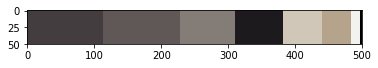

In [13]:
# making a color palette, which will show the dominant colours and their
# relative areas covered in the image
color_pal = np.zeros((50,500,3)).astype(int)
start = 0
for ix in range(kmeans.n_clusters):
    width = int(lst[ix][0]*color_pal.shape[1])
    end = start + width
    color_pal[:,start:end,:] = lst[ix][1]
    start = end

plt.imshow(color_pal)
plt.show()

In [14]:
# Now, replacing every pixel in the image by the cluster it was assigned
# via K-means.
# this will recolour the picture with only the top 7-dominant colors
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]

# coverting the image back into 3D
c_img = np.reshape(c_img,(img.shape[0],img.shape[1],3))

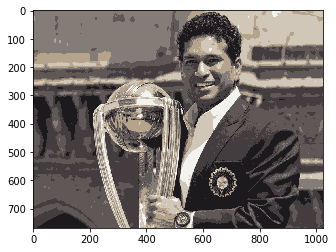

In [15]:
# The New Image with only the top 7-dominant colors!!
plt.imshow(c_img)
plt.show()